In [1]:
import numpy as np
import util as util
from linear_model import LinearModel

Load the datasets:

In [2]:
class Dataset:
    def __init__(self, train_path, eval_path):
        self.x_train, self.y_train = util.load_dataset(train_path, add_intercept=False)
        self.x_val, self.y_val = util.load_dataset(eval_path, add_intercept=False)
        self.x_train_intercept, self.y_train_intercept = util.load_dataset(train_path, add_intercept=True)
        self.x_val_intercept, self.y_val_intercept = util.load_dataset(eval_path, add_intercept=True)
        
ds1 = Dataset('/content/data/ds1_train.csv', '/content/data/ds1_valid.csv')
ds2 = Dataset('/content/data/ds2_train.csv', '/content/data/ds2_valid.csv')

Let's take a look at the two training sets:

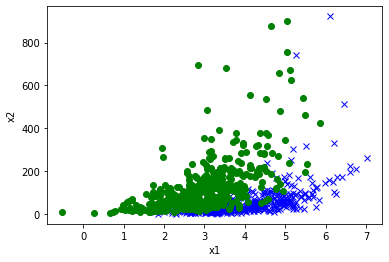

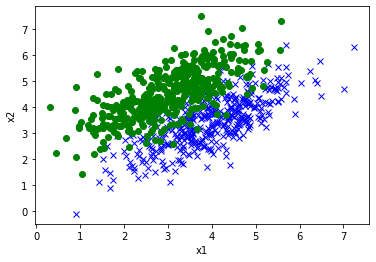

In [3]:
util.myplot(ds1.x_train, ds1.y_train)
util.myplot(ds2.x_train, ds2.y_train)

In [4]:
class GDA(LinearModel):
    """Gaussian Discriminant Analysis.

    Example usage:
        > clf = GDA()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x, y):
        """Fit a GDA model to training set given by x and y.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).

        Returns:
            theta: GDA model parameters.
        """
        # Find phi, mu_0, mu_1, and sigma
        # Write theta in terms of the parameters
        
        m,n = x.shape
        y_vec = np.reshape(y,(-1,1))
        
        phi= 1/m * np.sum(y)
        mu_0 = np.sum(x*(1-y_vec), axis= 0) / np.sum(1-y)
        mu_1 = np.sum(x*y_vec, axis=0) / np.sum(y)
        mu_x = y_vec*mu_1 +(1-y_vec)*mu_0
        x_norm = x-mu_x
        sigma = 1/m * np.dot(x_norm.T, x_norm)
        
        sigma_inv = np.linalg.inv(sigma)
        
        theta = -np.dot(sigma_inv,mu_0 - mu_1)
        theta0 = np.array([1/2* mu_0 @ sigma_inv @ mu_0 -1/2* mu_1 @ sigma_inv @ mu_1 -np.log((1-phi)/phi)])
        self.theta = np.concatenate((theta0, theta))
        
        return self.theta

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        x_intercept = util.add_intercept(x)
        #return 1/ (1+ np.exp(-x_intercept @ self.theta))
        return x_intercept @ self.theta >= 0


Let's train a GDA classifier for dataset 1 and plot the learned decision boundary on the training and the validation set.

theta for dataset1: [-6.17158405  2.22055506 -0.01763375]


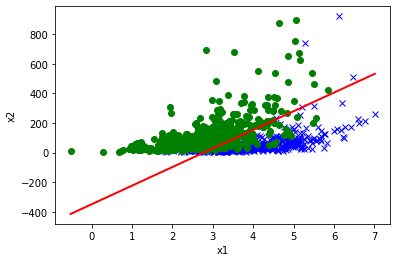

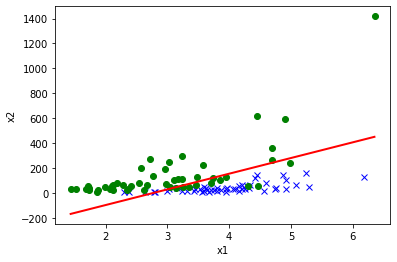

In [5]:
gda1 = GDA()
gda1.fit(ds1.x_train, ds1.y_train)

util.myplot(ds1.x_train,ds1.y_train, gda1.theta)
util.myplot(ds1.x_val,ds1.y_val, gda1.theta)
print("theta for dataset1:",gda1.theta)

The same for dataset 2:



theta for dataset2 [ 2.50874989  3.76951271 -3.94657107]


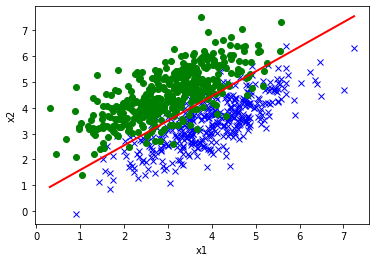

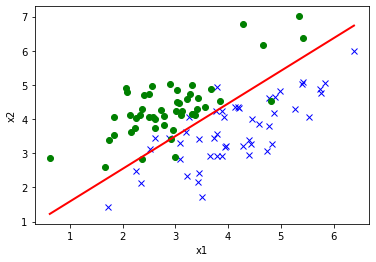

In [6]:
gda2 = GDA()
gda2.fit(ds2.x_train, ds2.y_train)

util.myplot(ds2.x_train,ds2.y_train, gda2.theta)
util.myplot(ds2.x_val, ds2.y_val, gda2.theta)
print("theta for dataset2" ,gda2.theta)